In [63]:
import os

import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import preprocessing, linear_model, model_selection, metrics

from sklearn.linear_model import LinearRegression

# Predicting product performance in video eCommerce

 Overview:
My company produces 2-3 minute video segments for products that feature a host/presenter ( like HSN but shorter and online!). We use our content and syndicate it across out publisher network to generate sales. In this business, the KPIs are gross revenue, total # of views (think of this as your foot traffic to a store), conversion rate and more. 
 

### Problem Statement:
We have hit a stage where in order to scale the business, you need to purchase more distribution. There is a need for a predictive model where if we input the category of a product, sale price and total number of views, we should have a prediction of the number of views and gross revenue we would receive. There are other needs for a predictive model, such as the need to predict views or units sold. This will help the team make better choices as to which content to place on specific publisher.



### What to find in the data ?

Build a model that shows the gross revenue based on number of views, sale price, and which campaign source to feature

At what sale price does each campaign source generate the most views and revenue? Is there a signifiance in the correlation between category with views and gross revenue? 


## Methodology

Linear Regression & Linear Regression Modeling with sklearn

Use multilinear linear regression to find any significance between variables (views in relation to sale price, category in relation to gross sales,  sale price in relation to gross sales, syndication source in relation to gross sales). 

#### -  Of the variables that have significance, rank the order of signifiance.


## Goals / Indicators of Success

Just build a predictive model using STATSMODEL and SCILEARN that has a R-square value of .60 > 

## Challenges / Concerns

### Interaction Effects and gression plot between different variables to the response variable (gross sales)


## About the data file: 
### I used Looker (our analytics tool that tracks transactional data) to pull information on all video sales from 1/1/2015 - 12/31/2016. I filtered only for videos with 1000> views. When we do feature a video on any particular day, the video receives well over 1000 views so I want to filter out noise. 

In [64]:
df = pd.read_csv(os.path.join('Video sales dataset.csv'), index_col = 'Video_ID')



In [65]:
df

,Date,Campaign_Source,Category,Presenter,RPV,TotalViews,GrossRevenue,TotalUnitsSold,SalePrice
Video_ID,,,,,,,,,
3360.0,12/31/16,syndication-comcast,Beauty,Susan Yara,0.17,1759,300.0,8,37.50
3400.0,12/31/16,syndication-aol-hp-test,Home,Marcy McKenna,0.27,1495,408.0,6,68.00
2958.0,12/31/16,syndication-AOL-CPV,Home,Marcy McKenna,0.04,2109,80.0,4,20.00
3399.0,12/31/16,syndication-AOL-CPV,Beauty,Jenny Patinkin,0.31,7272,2251.0,35,64.31
3398.0,12/31/16,syndication-aol-hp-test,Home,Marcy McKenna,0.33,3441,1152.0,9,128.00
...,...,...,...,...,...,...,...,...,...
1818.0,1/2/15,syndication-aol-hp-test,Beauty,Tracy O'Connor,0.18,3325,610.0,12,50.83
1821.0,1/2/15,syndication-aol-hp-test,Beauty,Tracy O'Connor,0.09,11998,1096.0,17,64.47
1814.0,1/1/15,syndication-aol-hp-test,Beauty,Mikaela South,0.07,1467,100.0,5,20.00


###  Describing the Data

In [66]:
df.shape

# There are 2539 rows and 10 columns, meaning we're working with 2539 videos and  have 10 columns as potential response variables


(2539, 9)

In [67]:
df.columns

Index([u' Date', u'Campaign_Source', u'Category', u'Presenter', u'RPV',
       u'TotalViews', u'GrossRevenue', u'TotalUnitsSold', u'SalePrice'],
      dtype='object')

In [68]:
df.Campaign_Source.value_counts()


syndication-aol-hp-test      2364
syndication-comcast            88
syndication-AOL-CPV            49
marketing-campaigns-joyus      30
paid-ads-facebook               8
Name: Campaign_Source, dtype: int64

In [69]:
df.describe()

,RPV,TotalViews,GrossRevenue,TotalUnitsSold,SalePrice
count,2539.000000,2539.000000,2539.000000,2539.000000,2373.000000
mean,0.297712,8316.061835,2164.047424,40.994092,70.677788
std,0.366973,10239.767237,3276.157574,68.649149,51.737982
min,0.000000,1001.000000,0.000000,0.000000,3.270000
25%,0.090000,1882.000000,297.000000,5.000000,38.000000
50%,0.190000,4628.000000,1020.000000,17.000000,58.000000
75%,0.350000,10909.000000,2580.000000,47.000000,89.000000
max,3.950000,128400.000000,47892.000000,850.000000,449.000000


#### Summary of the Data

Out of our dataset, we have 2539 videos that have over 1000 views from Syndication-AOL, Sydnication-AOL-CPV, Syndication-comcast, marketing-campaigns, and paid-ads-Facebook. 

From the 2539 videos, we can expepect 95% CI (Confidence Intervals) of RPV to between .09 and $.35, total views between 1882 and 10909, gross revenue between 297 and 2580, total units sold between 5 and 47, and sale price between  38 and  89

### Take out null values

In [70]:
df.isnull().sum()

 Date                0
Campaign_Source      0
Category             0
Presenter            0
RPV                  0
TotalViews           0
GrossRevenue         0
TotalUnitsSold       0
SalePrice          166
dtype: int64

In [71]:
df.dropna(subset=['SalePrice'], inplace=True)

In [72]:
df.isnull().sum().sum()

# gut check

0

# PART A | Explanatory Data Analysis

## Sale Price

In [73]:
print df.SalePrice.median()
print df.SalePrice.mean()


58.0
70.6777876106


Median sale price is 58 and the mean sale price is 70.67 in our data set 

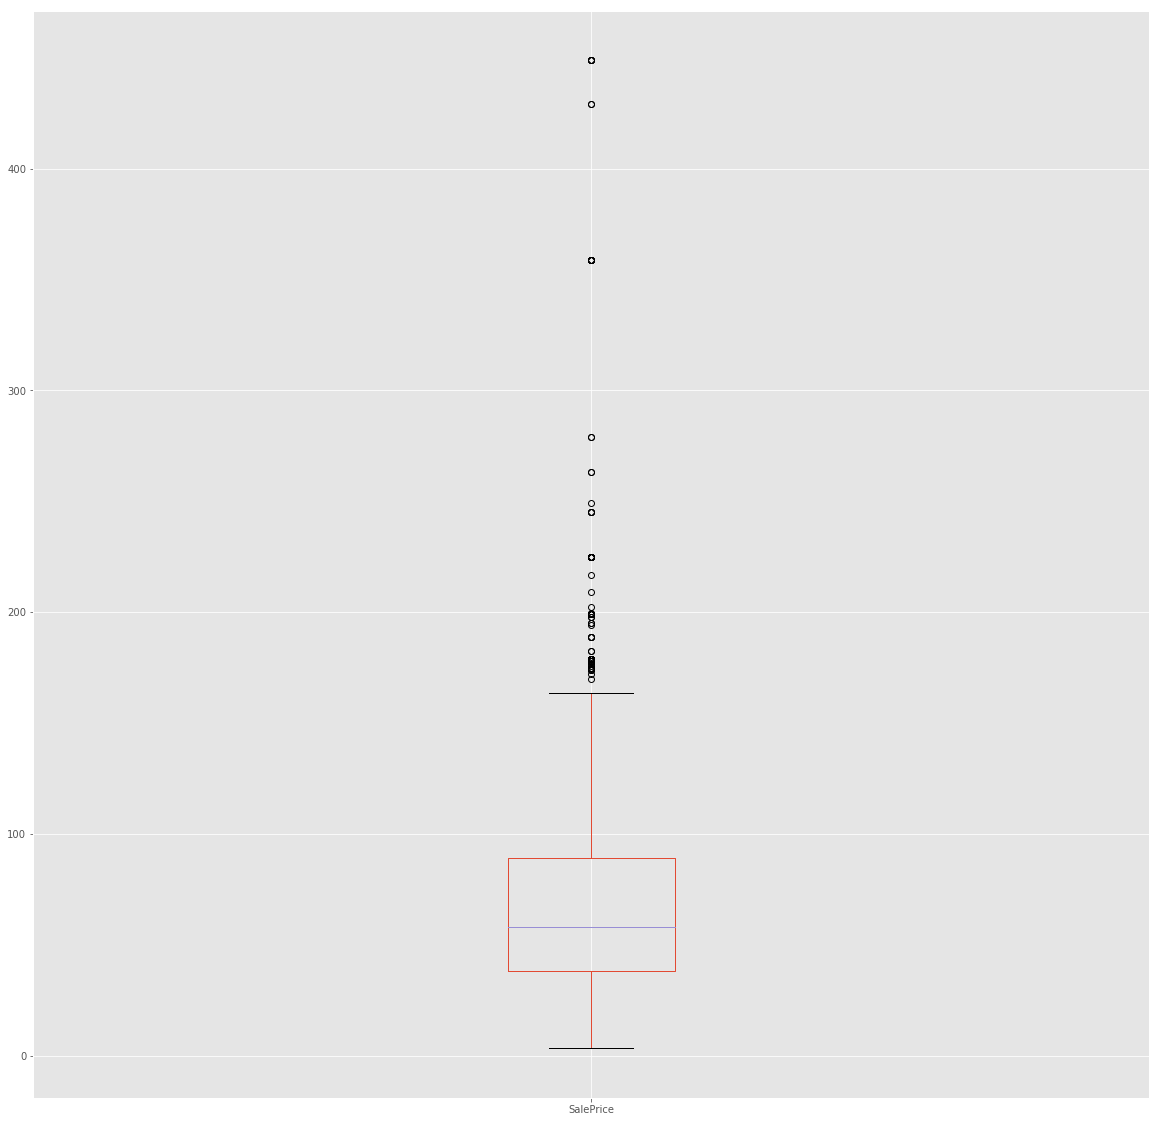

In [74]:
df.SalePrice.plot(kind = 'box', figsize = (20, 20))

## Conclusion: Price above ~$170 considered outliers


## Total Views

In [75]:
print df.TotalViews.median()
print df.TotalViews.mean()
# Median views per video in dataset is 4628 while the mean is 8316 

5081.0
8718.85335019


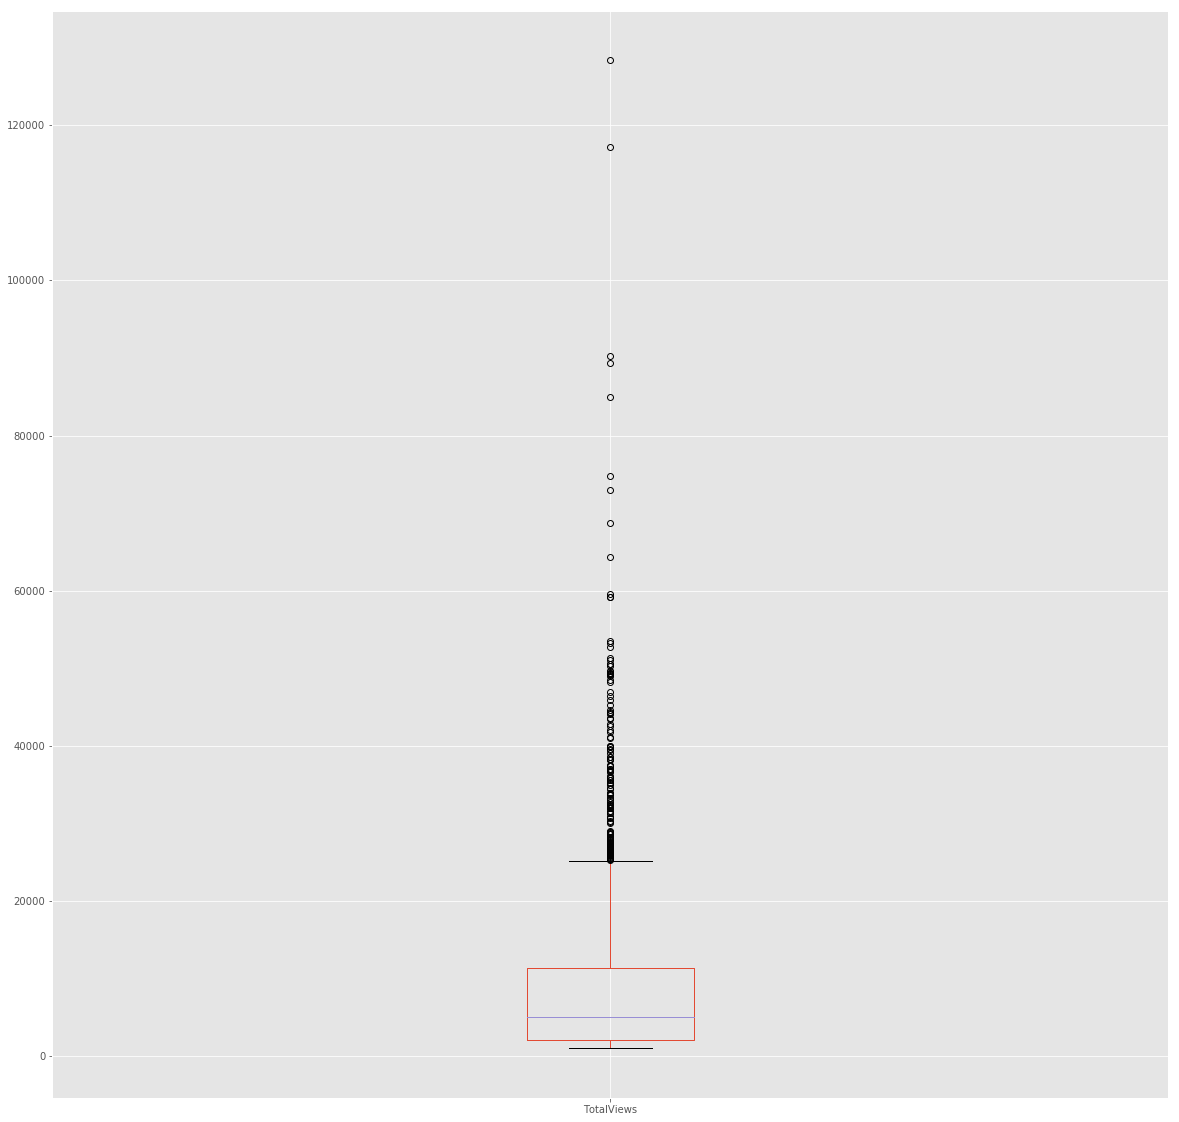

In [76]:
df.TotalViews.plot(kind = 'box', figsize = (20, 20))

### Compling other factors in relation to Gross Revenue

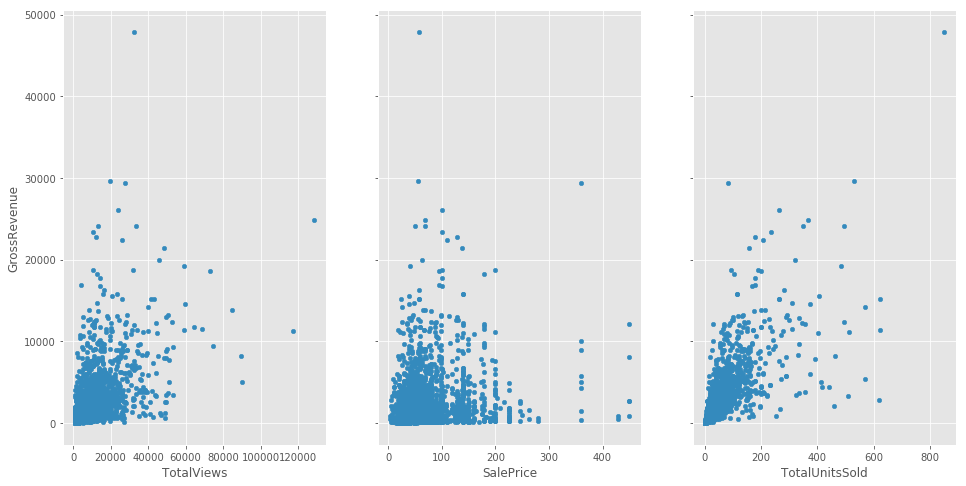

In [77]:
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='TotalViews', y='GrossRevenue', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='SalePrice', y='GrossRevenue', ax=axs[1])
df.plot(kind='scatter', x='TotalUnitsSold', y='GrossRevenue', ax=axs[2])

## Correlation

In [78]:
df.corr()


,RPV,TotalViews,GrossRevenue,TotalUnitsSold,SalePrice
RPV,1.000000,-0.119440,0.464042,0.221581,0.251574
TotalViews,-0.119440,1.000000,0.556776,0.577277,-0.056589
GrossRevenue,0.464042,0.556776,1.000000,0.728370,0.142505
TotalUnitsSold,0.221581,0.577277,0.728370,1.000000,-0.216372
SalePrice,0.251574,-0.056589,0.142505,-0.216372,1.000000


From the table,  Total Views and RPV have positive correlation to GrossRvenue. Sale price does not have a correlation to gross revenue. 

In [79]:
corr = df.corr()
list(corr.columns)

['RPV', 'TotalViews', 'GrossRevenue', 'TotalUnitsSold', 'SalePrice']

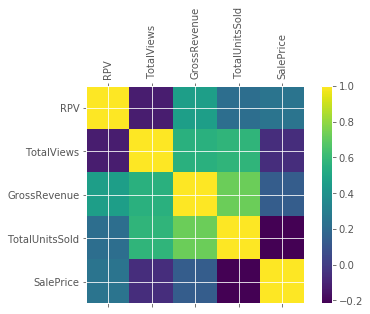

In [80]:
# Correlation heat map
figure = plt.figure()
subplot = figure.add_subplot(1, 1, 1)
figure.colorbar(subplot.matshow(corr))
subplot.set_xticklabels([None] + list(corr.columns), rotation = 90)
subplot.set_yticklabels([None] + list(corr.columns))

## Getting dummy variables for categorical features for SCIKIT Learn Model  (Campaign Source & Category)

In [81]:
df.Category.value_counts()

Beauty              872
Home                501
Accessories         477
Apparel             319
Health & Fitness    204
Name: Category, dtype: int64

In [82]:
c = pd.get_dummies(df.Campaign_Source, prefix = 'Source')

# include these dummies in your dataframe
c

,Source_marketing-campaigns-joyus,Source_paid-ads-facebook,Source_syndication-AOL-CPV,Source_syndication-aol-hp-test,Source_syndication-comcast
Video_ID,,,,,
3360.0,0,0,0,0,1
3400.0,0,0,0,1,0
2958.0,0,0,1,0,0
3399.0,0,0,1,0,0
3398.0,0,0,0,1,0
...,...,...,...,...,...
1818.0,0,0,0,1,0
1821.0,0,0,0,1,0
1814.0,0,0,0,1,0


In [83]:
df = df.join(c.ix[:, 'Source_marketing-campaigns-joyus':])

In [84]:


p = pd.get_dummies(df.Category, prefix = 'Category')

# include these dummies in your X matrix
p

,Category_Accessories,Category_Apparel,Category_Beauty,Category_Health & Fitness,Category_Home
Video_ID,,,,,
580.0,0,0,0,0,1
580.0,0,0,0,0,1
580.0,0,0,0,0,1
580.0,0,0,0,0,1
580.0,0,0,0,0,1
...,...,...,...,...,...
NaN,0,1,0,0,0
NaN,0,0,1,0,0
NaN,0,0,1,0,0


In [85]:

df = df.join(p.ix[:, 'Category_Accessories':])


In [86]:
df.columns

#  Now I have numerical values for all the categorical labels (category & campaign source)

Index([u' Date', u'Campaign_Source', u'Category', u'Presenter', u'RPV',
       u'TotalViews', u'GrossRevenue', u'TotalUnitsSold', u'SalePrice',
       u'Source_marketing-campaigns-joyus', u'Source_paid-ads-facebook',
       u'Source_syndication-AOL-CPV', u'Source_syndication-aol-hp-test',
       u'Source_syndication-comcast', u'Category_Accessories',
       u'Category_Apparel', u'Category_Beauty', u'Category_Health & Fitness',
       u'Category_Home'],
      dtype='object')

## PART B | Linear Regression  using StatsModel

### PREDICING REVENUE BY SALE PRICE

In [87]:
ls = smf.ols(formula = 'GrossRevenue ~ SalePrice', data = df).fit()
ls.params


Intercept    2736.592365
SalePrice       4.134769
dtype: float64

In [88]:
### Create sample data frame for prediction 
X_SaleP = pd.DataFrame({'SalePrice':[55,60,70,199]})
X_SaleP.head()

,SalePrice
0,55
1,60
2,70
3,199


In [89]:
predictsale = ls.predict(X_SaleP)
predictsale

array([ 2964.00466307,  2984.6785083 ,  3026.02619878,  3559.41140588])

Gross Revenue prediction based on X_SaleP sample data set, holding all other variables constant

#### CONFIDENCE IN THE MODEL

In [25]:
ls.conf_int()

,0,1
Intercept,2728.831322,2744.353409
SalePrice,4.073187,4.196351


In [90]:
ls.rsquared

0.0023143853685850813

The R-Squared value is the proportion of he variance explained in the model. This means that less than 1% of the variance in sale price is explained by the change in sale price in the model. We can assume there is no significant relationship between sales price and gross revenue in our model. 

### PREDICING REVENUE BY VIEWS

In [91]:
lv = smf.ols(formula = 'GrossRevenue ~ TotalViews', data = df).fit()
lv.params

### = y (gross sales) = 948.94 [X number of views]

Intercept     1136.672640
TotalViews       0.230534
dtype: float64

In [92]:
X_New = pd.DataFrame({'TotalViews':[5000,6000,7000]})
X_New.head()

,TotalViews
0,5000
1,6000
2,7000


In [31]:
lv.predict(X_New)

array([ 2250.00839706,  2447.47068369,  2644.93297031])

In [93]:
lv.rsquared

0.3826151141751577

## Multilinear Regression using Statsmodel
Factoring in multiple categories to get our response variable (gross revenue)

In [94]:
# Multilinear Regression Model 1
m1 = smf.ols(formula='GrossRevenue ~ TotalViews + Campaign_Source + Category', data=df).fit()
m1.params

Intercept                                     -856.073473
Campaign_Source[T.paid-ads-facebook]          2839.002208
Campaign_Source[T.syndication-AOL-CPV]         476.602328
Campaign_Source[T.syndication-aol-hp-test]    -173.861147
Campaign_Source[T.syndication-comcast]        -373.655224
Category[T.Apparel]                           1734.346943
Category[T.Beauty]                            1285.521851
Category[T.Health & Fitness]                  1901.934675
Category[T.Home]                              3480.961874
TotalViews                                       0.232533
dtype: float64

In [57]:
m1.rsquared

0.4353243778825252

In [60]:
# print summary of the fitted model
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           GrossRevenue   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                 6.395e+05
Date:                Sun, 25 Jun 2017   Prob (F-statistic):               0.00
Time:                        20:03:42   Log-Likelihood:            -7.0609e+07
No. Observations:             7465435   AIC:                         1.412e+08
Df Residuals:                 7465425   BIC:                         1.412e+08
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------------
Intercept                                   -856.0735     21.133    -40.508      0.000      -897.494  -814.653
Campaign_Source[T.paid-ads-facebook]        2839.0022     60.601     46.848      0.000      2720.227  2957.778
Campaign_Source[T.syndication-AOL-CPV]       476.6023     21.598     22.067      0.000       434.271   518.933
Campaign_Source[T.syndication-aol-hp-test]  -173.8611     20.592     -8.443      0.000      -214.221  -133.501
Campaign_Source[T.syndication-comcast]      -373.6552     21.211    -17.616      0.000      -415.227  -332.083
Category[T.Apparel]                         1734.3469      6.642    261.127      0.000      1721.329  1747.365
Category[T.Beauty]                          1285.5219      6.120    210.040      0.000      1273.526  1297.518
Category[T.Health & Fitness]                1901.9347      5.083    374.170      0.000      1891.972  1911.897
Category[T.Home]                            3480.9619      5.383    646.708      0.000      3470.412  3491.512
TotalViews                                     0.2325      0.000   2223.826      0.000         0.232     0.233
==============================================================================
Omnibus:                  4426012.795   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         93718358.810
Skew:                           2.458   Prob(JB):                         0.00
Kurtosis:                      19.647   Cond. No.                     7.95e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## PART C  | Multiple Linear Regression in scikit-learn

In [96]:
df.columns

Index([u' Date', u'Campaign_Source', u'Category', u'Presenter', u'RPV',
       u'TotalViews', u'GrossRevenue', u'TotalUnitsSold', u'SalePrice',
       u'Source_marketing-campaigns-joyus', u'Source_paid-ads-facebook',
       u'Source_syndication-AOL-CPV', u'Source_syndication-aol-hp-test',
       u'Source_syndication-comcast', u'Category_Accessories',
       u'Category_Apparel', u'Category_Beauty', u'Category_Health & Fitness',
       u'Category_Home'],
      dtype='object')

In [97]:
feature_cols = ['TotalViews', 'SalePrice', 'Source_syndication-AOL-CPV', 'Source_syndication-aol-hp-test', 'Source_marketing-campaigns-joyus',
                'Category_Accessories','Category_Apparel','Category_Beauty','Category_Health & Fitness','Category_Home']
X = df[feature_cols]
y = df.GrossRevenue


lr = LinearRegression()
lr.fit(X, y)

# print coefficients
zip(feature_cols, lr.coef_)

[('TotalViews', 0.23857804793619664),
 ('SalePrice', 17.756201062513192),
 ('Source_syndication-AOL-CPV', 258.19888941669024),
 ('Source_syndication-aol-hp-test', -188.40085302823542),
 ('Source_marketing-campaigns-joyus', -246.91818012907117),
 ('Category_Accessories', -1065.9389795406848),
 ('Category_Apparel', -410.44143634537267),
 ('Category_Beauty', -368.90369918179772),
 ('Category_Health & Fitness', -249.43211616440328),
 ('Category_Home', 2094.716231229509)]

## Hypothetical prediction 1 : A video in Beauty category with 15000 views with sale price at $55 and will be featured on syndication-aol-hp-test

In [103]:
lr.predict([10000,55,0,1,0,0,0,1,0,0])

/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 1676.53015853])

### Model predicts $2870 in gross sales

## Hypothetical prediction 2 : A video in Beauty category with 12000 views with sale price at $36 and will be featured on syndication-aol-hp-test

In [104]:
lr.predict([12000,50,0,1,0,0,0,1,0,0])

/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 2064.90524909])

### Model predicts $1816 in gross sales

### R-Square Value

In [42]:
# Caculating the R-squared: 
lr.score(X,y)

0.46779018046120979

## PART D  | Regularization

In [49]:

df.dropna(subset = ['TotalViews', 'SalePrice', 'Source_syndication-AOL-CPV', 'Source_syndication-aol-hp-test', 'Source_marketing-campaigns-joyus',
                'Category_Accessories','Category_Apparel','Category_Beauty','Category_Health & Fitness','Category_Home'], inplace = True)

train_X = df[ ['TotalViews', 'SalePrice', 'Source_syndication-AOL-CPV', 'Source_syndication-aol-hp-test', 'Source_marketing-campaigns-joyus',
                'Category_Accessories','Category_Apparel','Category_Beauty','Category_Health & Fitness','Category_Home']]

train_X = sm.add_constant(train_X)

train_y = df.GrossRevenue

smf.OLS(train_y, train_X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           GrossRevenue   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                 7.291e+05
Date:                Mon, 26 Jun 2017   Prob (F-statistic):               0.00
Time:                        15:01:47   Log-Likelihood:            -7.0388e+07
No. Observations:             7465435   AIC:                         1.408e+08
Df Residuals:                 7465425   BIC:                         1.408e+08
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------
const                             -940.4474      4.945   -190.195      0.000      -950.139  -930.756
TotalViews                           0.2386      0.000   2360.688      0.000         0.238     0.239
SalePrice                           17.7562      0.026    684.943      0.000        17.705    17.807
Source_syndication-AOL-CPV         258.1989      7.975     32.377      0.000       242.569   273.829
Source_syndication-aol-hp-test    -188.4009      5.096    -36.971      0.000      -198.389  -178.413
Source_marketing-campaigns-joyus  -246.9182     20.589    -11.993      0.000      -287.272  -206.565
Category_Accessories             -1254.0285      4.211   -297.786      0.000     -1262.282 -1245.775
Category_Apparel                  -598.5309      4.130   -144.938      0.000      -606.625  -590.437
Category_Beauty                   -556.9932      3.361   -165.722      0.000      -563.581  -550.406
Category_Health & Fitness         -437.5216      2.278   -192.056      0.000      -441.987  -433.057
Category_Home                     1906.6268      2.366    805.854      0.000      1901.990  1911.264
==============================================================================
Omnibus:                  4527661.626   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        114396088.470
Skew:                           2.476   Prob(JB):                         0.00
Kurtosis:                      21.527   Cond. No.                     5.18e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.69e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [50]:
np.linalg.inv(np.dot(train_X.T, train_X)).dot(train_X.T).dot(train_y)

array([ -1.54849610e+06,   2.12034070e-01,   9.57568612e+00,
         1.22900184e+03,  -4.98241637e+02,   5.40874906e+02,
         1.54879864e+06,   1.54592573e+06,   1.54301800e+06,
         1.54407168e+06,   1.54840345e+06])

### Truth

In [53]:

def f(x):
    return np.sin(2 * np.pi * x)

In [54]:
truth_df = pd.DataFrame(index = range(100))
truth_df['x'] = np.linspace(0, 1, truth_df.shape[0])
truth_df['y'] = truth_df.x.apply(f)

In [55]:
np.random.seed(0)

df = pd.DataFrame(index = range(100))
df['x'] = np.random.uniform(0, 1, size = df.shape[0])

df['Noise'] = np.random.normal(size = df.shape[0])
df['y'] = df.x.apply(f) * (1 + .5 * df.Noise)

In [56]:

X = df[ ['x'] ]
y = df.y


In [59]:
train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, train_size = .25)

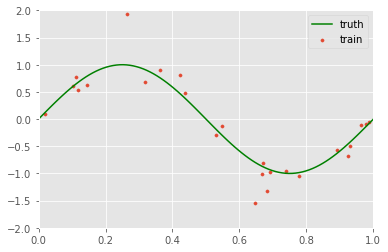

In [60]:

plt.figure()
plt.xlim((truth_df.x.min(), truth_df.x.max()))
plt.ylim((-2, 2))

plt.plot(truth_df.x, truth_df.y, color = 'green', label = 'truth')
plt.scatter(train_X.x, train_y, s = 10, label = 'train')

plt.legend()

## Final Write Up

-Before class started, my objective was to do was build a machine learning model to predict sales based on the metrics my company uses on a daily basis. Thus, what I built using SCIKIT-LEARN using multilinear regression fits to my objective. Problem I am having is regularization and how to get R-square value up so that the model is actually legitimate.



## Next Steps

Immediate Next Steps

    -Regularization
    
    -Figure out how to get a higher R-Squared value. 

    -Run the scikit-learn model with a difference response variable (total units sold or total views)

Within next 3 Months 

-Implement Time series to account for seasonal trends in retail
